Connor Contursi - Task 1

# Data Processing

In [31]:
# Imports
import numpy as np
import pandas as pd
import os

# Module imports
from skimage import io
from sklearn import metrics
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#---------------------------------------------------

# Accesses data
folder = 'C:/Users/indie/OneDrive/Desktop/images' # provide relative path to folder
ext = (".jpg", ".bmp")
# Gets images
images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.jpg')]

#Combines images into a list
ic = []
for img in images:
    ic.append(io.imread(img))

# Coverts list into array and then reshapes it
a, b, c = ic[0].shape
# for x in range (len(ic)):
#     ic[x].flatten()

ica = np.array(ic)
ica = ica.flatten().reshape(len(ic), a * b * c)

# Creates Y labels for different classes of images
y = np.zeros(len(ic))
for a in range (int((1/3)*len(ic)), int((2/3)*len(ic))):
    y[a] = 1
    
for b in range (int((2/3)*len(ic)), len(ic)):
    y[b] = 2

### Logistic Regression Model & Results

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.61      0.53      0.57       158
         1.0       0.49      0.48      0.49       130
         2.0       0.49      0.59      0.54       135

    accuracy                           0.53       423
   macro avg       0.53      0.53      0.53       423
weighted avg       0.54      0.53      0.53       423



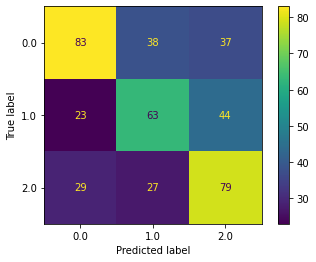

In [34]:
#Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(ica, y, test_size = 0.20)

# creates logistic regression classifier; fits data with trained sets; generates predictions from test split
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Decision Trees Model & Results


C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.38      0.37      0.37       139
         1.0       0.29      0.27      0.28       138
         2.0       0.33      0.36      0.34       146

    accuracy                           0.33       423
   macro avg       0.33      0.33      0.33       423
weighted avg       0.33      0.33      0.33       423



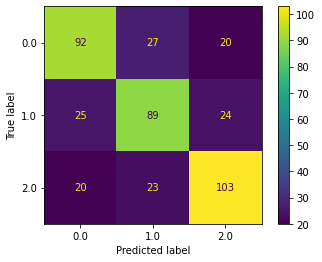

In [35]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(ica, y, test_size = 0.20)

# creates decision tree classifier; fits data with trained sets; generates predictions from test split
model = DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Random Forests Model & Results

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.34      0.34      0.34       135
         1.0       0.30      0.27      0.29       143
         2.0       0.31      0.34      0.33       145

    accuracy                           0.32       423
   macro avg       0.32      0.32      0.32       423
weighted avg       0.32      0.32      0.32       423



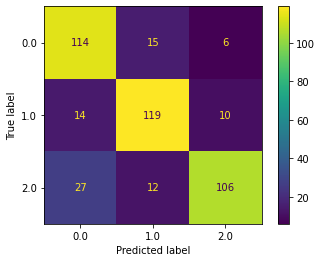

In [36]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(ica, y, test_size = 0.20)

# creates random forest classifier; fits data with trained sets; generates predictions from test split
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

From all of the models, we can see that the precision of the data varies quite a bit more than we'd like to see, and the accuracy is not high enough to give confidence in the model.